In [1]:
import os,sys,json
import core.nsf_utils, core.openaire_utils

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
def plot_pub_vs_pis(t_type, data, size):
    plt.figure(figsize=(10,6))
    plt.title("[{} {}-{}] Number of publications by number of PIs".format(t_type, years[0], years[-1]))
    plt.ylabel("Number of publications")
    plt.xlabel("Number of PIs (team leaders)")
    x = [d["num_pis"] for d in data.values()]
    y = [d["num_pubs"] for d in data.values()]
    if size == "amount":
        s = [np.sqrt(d["amount"])/5 for d in data.values()]
    if size == "teamsize":
        s = [np.mean(d["team_size"]) for d in data.values()]
    plt.scatter(x, y, s=s, alpha=0.5)
    print("\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
    print("\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
    # plt.legend(div_type, bbox_to_anchor=(1, 1))

def plot_pub_vs_ncc(t_type, data, size):
    plt.figure(figsize=(10,6))
    plt.title("[{} {}-{}] Number of publications by number of teams".format(t_type, years[0], years[-1]))
    plt.ylabel("Number of publications")
    plt.xlabel("Number of teams (coauthor connected components)")
    x = [d["num_cc"] for d in data.values()]
    y = [d["num_pubs"] for d in data.values()]
    if size == "amount":
        s = [np.sqrt(d["amount"])/5 for d in data.values()]
    if size == "teamsize":
        s = [np.mean(d["team_size"]) for d in data.values()]
    plt.scatter(x, y, s=s, alpha=0.5)
    plt.plot(x, x,"--") # y=x plot
    print("\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
    print("\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
    # plt.legend(div_type, bbox_to_anchor=(1, 1))

# NSF data ["Standard Grant", "Continuing grant"]

In [3]:
years = [2000, 2001, 2003, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2015]
data = {}
for y in years:
    data.update(core.nsf_utils.team_analysis(y))
data = {k:v for k, v in data.items() if v["type"] in ["Standard Grant", "Continuing grant"]}

			X mean=1.71, std=1.13, median=1.00
			Y mean=4.19, std=11.27, median=0.00


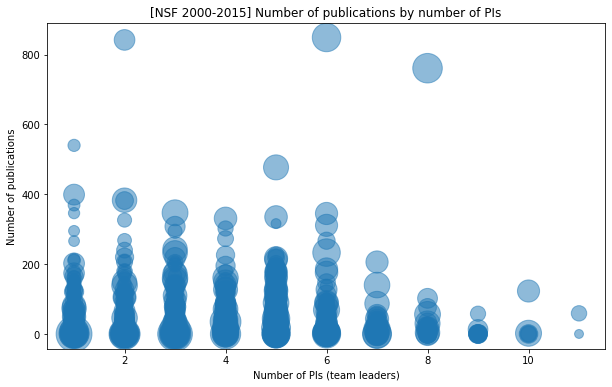

In [4]:
plot_pub_vs_pis("NSF", data, "amount")

			X mean=1.01, std=1.88, median=0.00
			Y mean=4.19, std=11.27, median=0.00


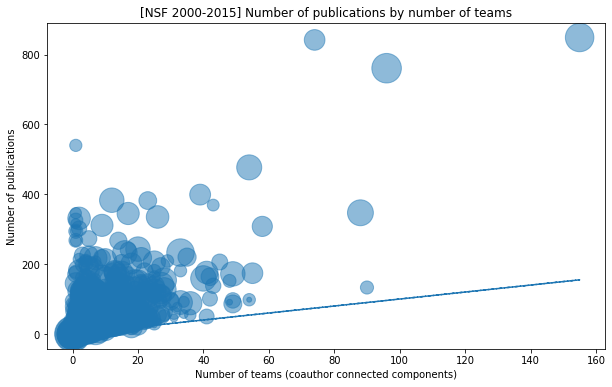

In [5]:
plot_pub_vs_ncc("NSF", data, "amount")

			X mean=1.01, std=1.88, median=0.00
			Y mean=4.19, std=11.27, median=0.00


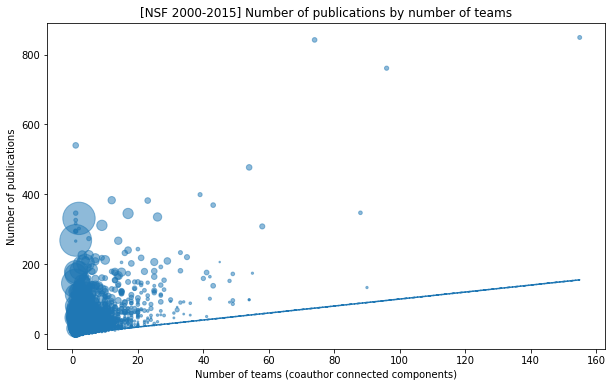

In [6]:
plot_pub_vs_ncc("NSF", data, "teamsize")

			X mean=6.22, std=14.25, median=0.00
			Y mean=4.19, std=11.27, median=0.00


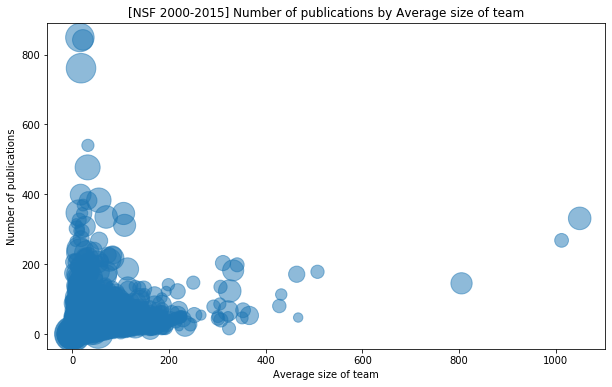

In [7]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of publications by Average size of team".format("NSF", years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Average size of team")
x = [np.mean(d["team_size"]) for d in data.values()]
y = [d["num_pubs"] for d in data.values()]
s = [np.sqrt(d["amount"])/5 for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))

			X mean=1.71, std=1.13, median=1.00
			Y mean=1.01, std=1.88, median=0.00


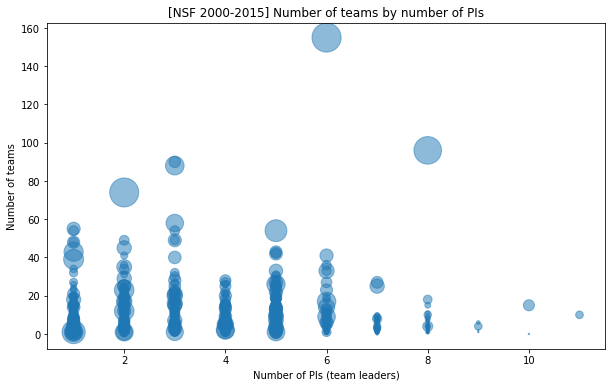

In [9]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of teams by number of PIs".format("NSF", years[0], years[-1]))
plt.ylabel("Number of teams")
plt.xlabel("Number of PIs (team leaders)")
x = [d["num_pis"] for d in data.values()]
y = [d["num_cc"] for d in data.values()]
# s = [np.sqrt(d["amount"])/5 for d in data.values()]
s = [d["num_pubs"] for d in data.values()]
# s = [np.mean(d["team_size"]) for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(div_type, bbox_to_anchor=(1, 1))

			X mean=1.71, std=1.13, median=1.00
			Y mean=6.22, std=14.25, median=0.00


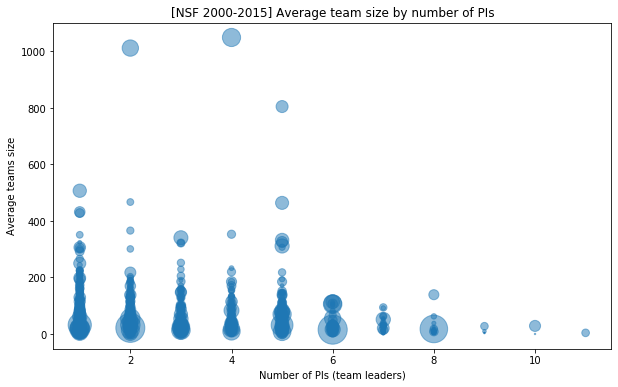

In [13]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Average team size by number of PIs".format("NSF", years[0], years[-1]))
plt.ylabel("Average teams size")
plt.xlabel("Number of PIs (team leaders)")
x = [d["num_pis"] for d in data.values()]
y = [np.mean(d["team_size"]) for d in data.values()]
# s = [np.sqrt(d["amount"])/5 for d in data.values()]
s = [d["num_pubs"] for d in data.values()]
# s = [d["num_cc"] for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(div_type, bbox_to_anchor=(1, 1))

			X mean=1.01, std=1.88, median=0.00
			Y mean=6.22, std=14.25, median=0.00


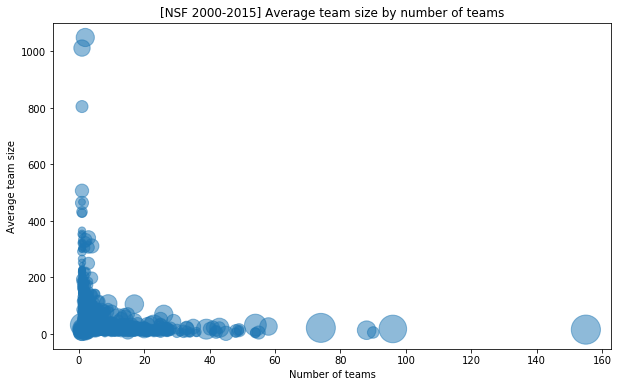

In [14]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Average team size by number of teams".format("NSF", years[0], years[-1]))
plt.ylabel("Average team size")
plt.xlabel("Number of teams")
x = [d["num_cc"] for d in data.values()]
y = [np.mean(d["team_size"]) for d in data.values()]
# s = [np.sqrt(d["amount"])/5 for d in data.values()]
s = [d["num_pubs"] for d in data.values()]
# s = [d["num_cc"] for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(div_type, bbox_to_anchor=(1, 1))

unsuccessful (pub < 3) 			X mean=0.62, std=1.16, median=0.00
unsuccessful (pub < 3) 			Y mean=1.91, std=4.36, median=0.00
successful (pub > 20) 			X mean=27.03, std=3.39, median=29.00
successful (pub > 20) 			Y mean=35.27, std=43.43, median=23.50


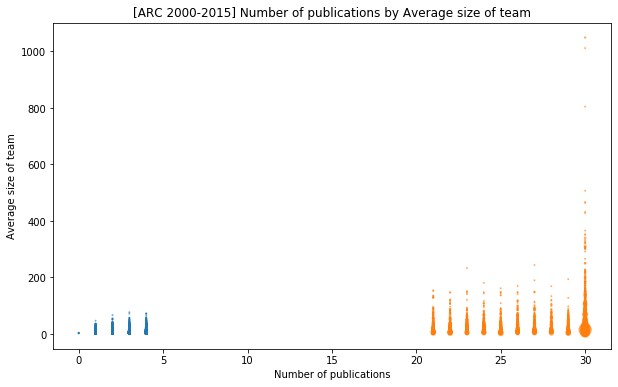

In [16]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of publications by Average size of team".format("ARC", years[0], years[-1]))
plt.xlabel("Number of publications")
plt.ylabel("Average size of team")
# unsuccessful (pub < 5)
x = [d["num_pubs"] for d in data.values() if d["num_pubs"] < 5]
y = [np.mean(d["team_size"]) for d in data.values() if d["num_pubs"] < 5]
# s = [np.sqrt(d["amount"])/5 for d in data.values() if d["num_pubs"] < 5]
s = [d["num_cc"] for d in data.values() if d["num_pubs"] < 5]
plt.scatter(x, y, s=s, alpha=0.5)
print("unsuccessful (pub < 3)", "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("unsuccessful (pub < 3)", "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# successful (pub > 20)
x = [min(30, d["num_pubs"]) for d in data.values() if d["num_pubs"] > 20]
y = [np.mean(d["team_size"]) for d in data.values() if d["num_pubs"] > 20]
# s = [np.sqrt(d["amount"])/5 for d in data.values() if d["num_pubs"] > 20]
s = [d["num_cc"] for d in data.values() if d["num_pubs"] > 20]
plt.scatter(x, y, s=s, alpha=0.5)
print("successful (pub > 20)", "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("successful (pub > 20)", "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(index, bbox_to_anchor=(1, 1))

## Institution

Princeton University 			X mean=1.20, std=1.74, median=1.00
Princeton University 			Y mean=7.47, std=13.96, median=2.00
University of Washington 			X mean=1.03, std=1.47, median=0.00
University of Washington 			Y mean=6.50, std=12.79, median=0.00
University of Massachusetts Amherst 			X mean=1.04, std=1.49, median=1.00
University of Massachusetts Amherst 			Y mean=5.83, std=11.39, median=2.00


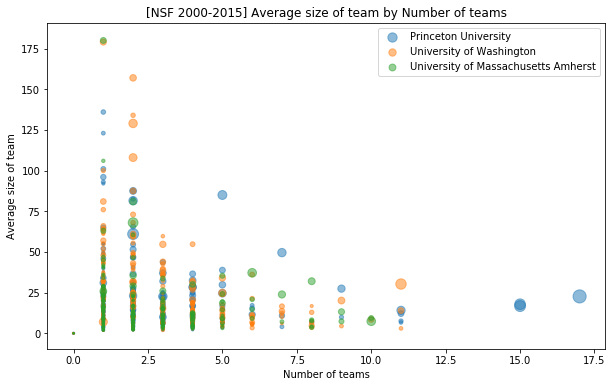

In [17]:
index = [
    "Princeton University", 
    "University of Washington",
    "University of Massachusetts Amherst",
#     "Massachusetts Institute of Technology"
#     "Stanford University"
        ]
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Average size of team by Number of teams".format("NSF", years[0], years[-1]))
plt.ylabel("Average size of team")
plt.xlabel("Number of teams")
for inst in index:
    x = [d["num_cc"] for d in data.values() if d["inst"] == inst]
    y = [np.mean(d["team_size"]) for d in data.values() if d["inst"] == inst]
    s = [d["num_pubs"] for d in data.values() if d["inst"] == inst]
    plt.scatter(x, y, s=s, alpha=0.5)
    print(inst, "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
    print(inst, "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(index, bbox_to_anchor=(1, 1))

Princeton University 			X mean=7.47, std=13.96, median=2.00
Princeton University 			Y mean=6.28, std=12.94, median=1.00
University of Washington 			X mean=6.50, std=12.79, median=0.00
University of Washington 			Y mean=3.84, std=7.42, median=0.00
University of Massachusetts Amherst 			X mean=5.83, std=11.39, median=2.00
University of Massachusetts Amherst 			Y mean=3.98, std=8.27, median=1.00


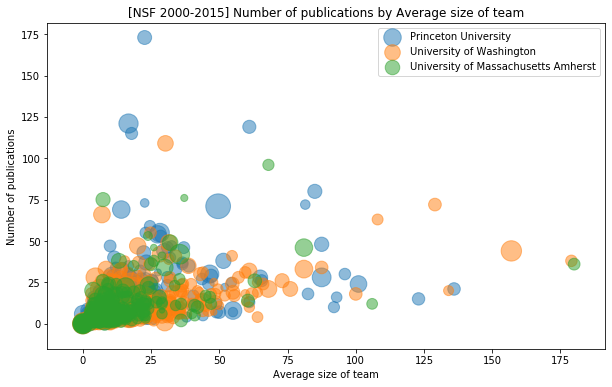

In [18]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of publications by Average size of team".format("NSF", years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Average size of team")
for inst in index:
    x = [np.mean(d["team_size"]) for d in data.values() if d["inst"] == inst]
    y = [d["num_pubs"] for d in data.values() if d["inst"] == inst]
    s = [np.sqrt(d["amount"])/5 for d in data.values() if d["inst"] == inst]
#     s = [np.mean(d["team_size"]) for d in data.values() if d["inst"] == inst]
    plt.scatter(x, y, s=s, alpha=0.5)
    print(inst, "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
    print(inst, "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(index, bbox_to_anchor=(1, 1))

# ARC data ["DP", "LP"]

In [6]:
years = range(2002, 2019)
data = {}
for y in years:
    data.update(core.openaire_utils.team_analysis(y))
data = {k:v for k, v in data.items() if v["type"] in ["DP", "LP"]}

			X mean=2.92, std=1.89, median=3.00
			Y mean=0.63, std=1.71, median=0.00


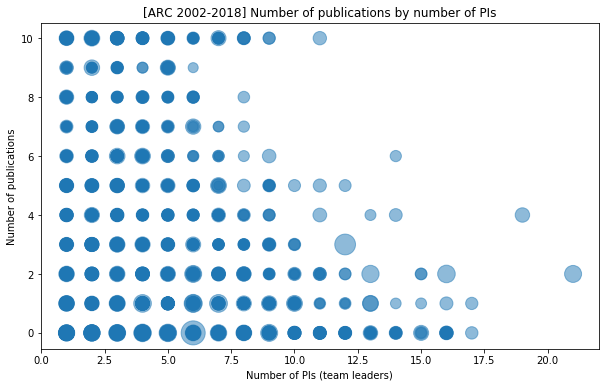

In [7]:
plot_pub_vs_pis("ARC", data, "amount")

			X mean=0.32, std=0.70, median=0.00
			Y mean=0.63, std=1.71, median=0.00


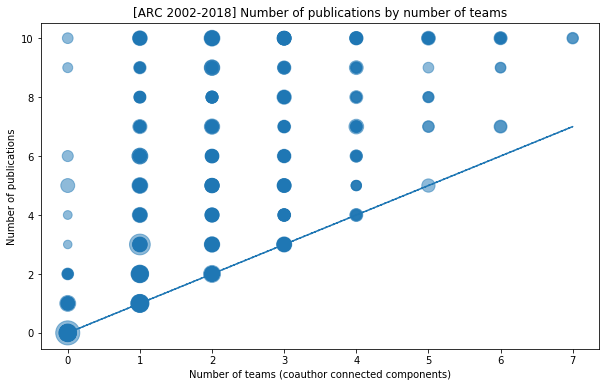

In [8]:
plot_pub_vs_ncc("ARC", data, "amount")

			X mean=0.32, std=0.70, median=0.00
			Y mean=0.63, std=1.71, median=0.00


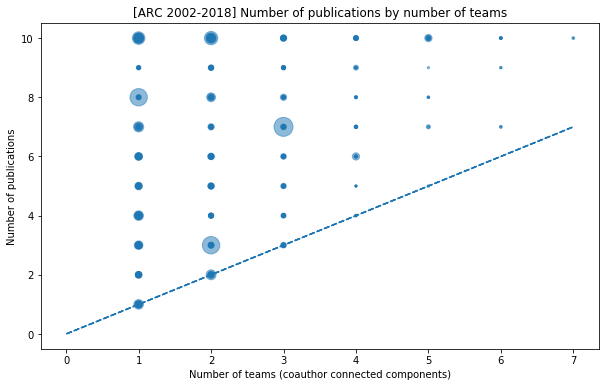

In [9]:
plot_pub_vs_ncc("ARC", data, "teamsize")

The Australian National University 			X mean=2.15, std=5.45, median=0.00
The Australian National University 			Y mean=0.93, std=2.24, median=0.00
The University of New South Wales 			X mean=1.61, std=4.74, median=0.00
The University of New South Wales 			Y mean=0.60, std=1.63, median=0.00
The University of Melbourne 			X mean=1.98, std=13.57, median=0.00
The University of Melbourne 			Y mean=0.54, std=1.53, median=0.00


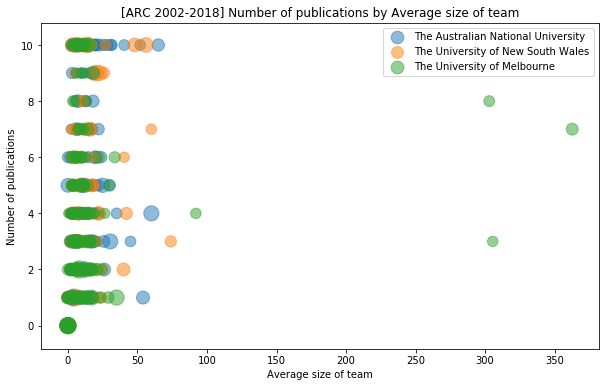

In [10]:
index = [
    "The Australian National University",
    "The University of New South Wales", 
    "The University of Melbourne",
#     "The University of Sydney",
        ]
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of publications by Average size of team".format("ARC", years[0], years[-1]))
plt.ylabel("Number of publications")
plt.xlabel("Average size of team")
for inst in index:
    x = [np.mean(d["team_size"]) for d in data.values() if d["inst"] == inst]
    y = [d["num_pubs"] for d in data.values() if d["inst"] == inst]
    s = [np.sqrt(d["amount"])/5 for d in data.values() if d["inst"] == inst]
#     s = [np.mean(d["team_size"]) for d in data.values() if d["inst"] == inst]
    plt.scatter(x, y, s=s, alpha=0.5)
    print(inst, "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
    print(inst, "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(index, bbox_to_anchor=(1, 1))

The Australian National University 			X mean=2.56, std=1.70, median=2.00
The Australian National University 			Y mean=0.40, std=0.80, median=0.00
The University of New South Wales 			X mean=2.76, std=1.86, median=2.00
The University of New South Wales 			Y mean=0.32, std=0.71, median=0.00
The University of Melbourne 			X mean=2.86, std=2.00, median=2.00
The University of Melbourne 			Y mean=0.29, std=0.69, median=0.00


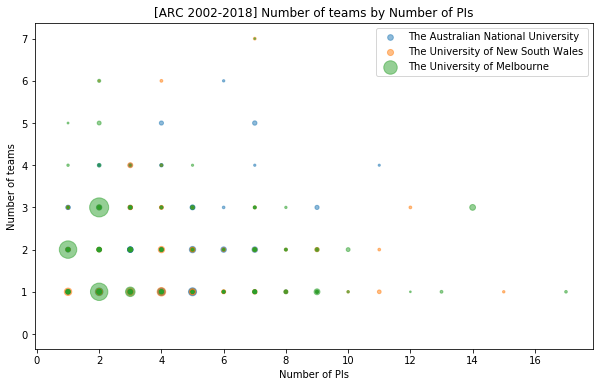

In [11]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of teams by Number of PIs".format("ARC", years[0], years[-1]))
plt.ylabel("Number of teams")
plt.xlabel("Number of PIs")
for inst in index:
    x = [d["num_pis"] for d in data.values() if d["inst"] == inst]
    y = [d["num_cc"] for d in data.values() if d["inst"] == inst]
#     s = [np.sqrt(d["amount"])/5 for d in data.values() if d["inst"] == inst]
    s = [np.mean(d["team_size"]) for d in data.values() if d["inst"] == inst]
#     s = [d["num_pubs"]*3 for d in data.values() if d["inst"] == inst]
    plt.scatter(x, y, s=s, alpha=0.5)
    print(inst, "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
    print(inst, "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
plt.legend(index, bbox_to_anchor=(1, 1))

unsuccessful (pub < 3) 			X mean=0.20, std=0.51, median=0.00
unsuccessful (pub < 3) 			Y mean=0.96, std=3.11, median=0.00
successful (pub > 7) 			X mean=9.61, std=0.73, median=10.00
successful (pub > 7) 			Y mean=16.10, std=24.42, median=10.00


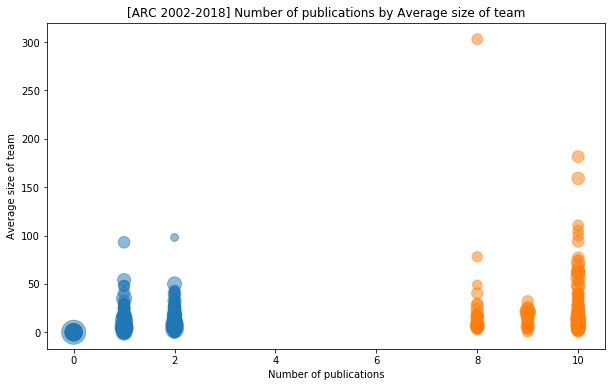

In [12]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of publications by Average size of team".format("ARC", years[0], years[-1]))
plt.xlabel("Number of publications")
plt.ylabel("Average size of team")
# unsuccessful (pub < 3)
x = [d["num_pubs"] for d in data.values() if d["num_pubs"] < 3]
y = [np.mean(d["team_size"]) for d in data.values() if d["num_pubs"] < 3]
s = [np.sqrt(d["amount"])/5 for d in data.values() if d["num_pubs"] < 3]
#     s = [np.mean(d["team_size"]) for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("unsuccessful (pub < 3)", "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("unsuccessful (pub < 3)", "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# successful (pub > 7)
x = [d["num_pubs"] for d in data.values() if d["num_pubs"] > 7]
y = [np.mean(d["team_size"]) for d in data.values() if d["num_pubs"] > 7]
s = [np.sqrt(d["amount"])/5 for d in data.values() if d["num_pubs"] > 7]
#     s = [np.mean(d["team_size"]) for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("successful (pub > 7)", "\t\t\tX mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(x), np.std(x), np.median(x)))
print("successful (pub > 7)", "\t\t\tY mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(index, bbox_to_anchor=(1, 1))